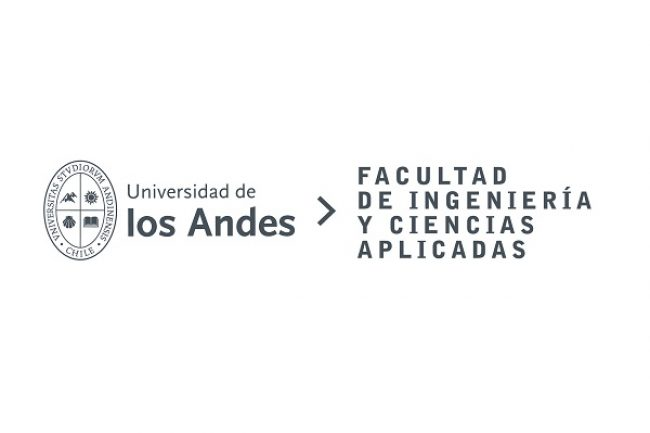

FUNDAMENTOS DE ECONOMÍA

Preinforme N°1

Grupo: 18 

Integrantes:

Amalia Castillo

Adrián Gonzáles

Sebastián Véliz

Profesores:
Sebastián Cea

Ayudante: 

Gonzalo Carrasco

#PREINFORME ECONOMÍA
En el presente informe, se estudiará el rubro escogido (Energía Solar) como mercado. Para esto, es necesario tomar en cuenta que la finalidad de la energía solar es producir electricidad, siendo esto el producto vendido. 

Luego, se tomaron dos empresas, Enel Green Power Chile y Colbún para realizar una simulación de FPP, calcular la elasticidad y simular el equilibrio del mercado. 


# P1: FPP

Datos de Enel Green Power Chile:

A lo largo del país opera un portafolio de 36 plantas que tienen una capacidad instalada combinada que supera los 4.730 MW, correspondientes al 45% de la capacidad renovable de Chile. De su capacidad instalada, 642 MW corresponden a energía eólica, a través de 9 parques eólicos, 492 MW provienen de energía solar y son generados por 8 plantas fotovoltaicas y 3.548 MW son producidos por 18 centrales hidroeléctricas. 

Datos más relevantes:
*   Terrenos disponibles: 17  →  $h = 17$
*   [ Energía Solar ] - Energía producida por terreno: 61.5 MW 
*   [ Energía Solar ] - Cantidad de terreno que se necesita para producir 1 MW: 0.01626016  →  $a_1 = 0.01626016$
*   [ Energía Solar ] - Máxima produccion de energía: 1045.5 MW  →  $y_1=1045.5$
*   [ Energía Eólica ] - Energía producida por terreno: 71.333 MW
*   [ Energía Eólica ] - Terreno necesario para producir 1 MW: 0.01402524  →  $a_2 = 0.01402524$
*   [ Energía Eólica ] - Máxima produccion de energía: 1212.1 MW  →  $y_2 = 1212.1$

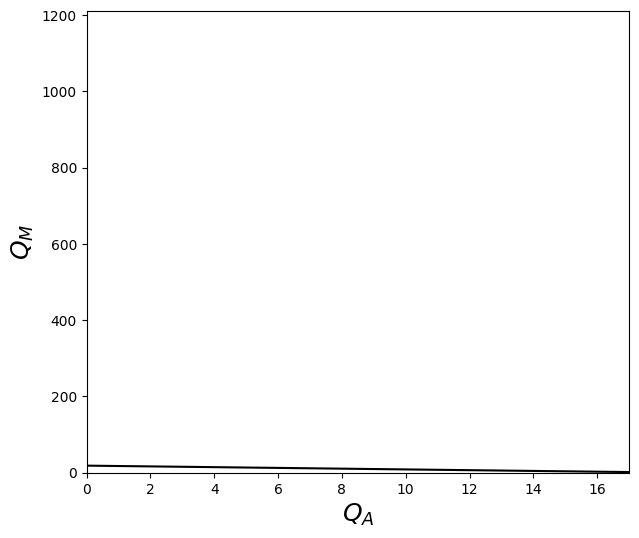

In [17]:
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
from ipywidgets import interact, fixed

# initial parameters
ALPHA = 0.01626016   # capital share in eolic energy
BETA = 0.01402524   # capital share in solar energy
KBAR = 1212.1  # Total capital supply
LBAR = 17  # Total labor supply
p = 1      # =Pa/Pm  relative price of ag goods

def F(K,L,alpha=ALPHA):
    """Agriculture Production function"""
    return (K**alpha)*(L**(1-alpha))

def G(K,L,beta=BETA):
    """Manufacturing Production function"""
    return (K**beta)*(L**(1-beta))

def budgetc(c1, p1, p2, I):
    return (I/p2)-(p1/p2)*c1

def isoq(L, Q, mu):
    return (Q/(L**(1-mu)))**(1/mu)

def edgeworth(L, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA, beta=BETA):
    """efficiency locus: """
    a = (1-alpha)/alpha
    b = (1-beta)/beta
    return b*L*Kbar/(a*(Lbar-L)+b*L)

def edgeplot(LA, Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw an edgeworth box
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F(KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    print("(LA,KA)=({:4.1f}, {:4.1f})  (QA, QM)=({:4.1f}, {:4.1f})  RTS={:4.1f}"
          .format(LA,KA,QA,QM,RTS))
    La = np.arange(1,Lbar)
    fig, ax = plt.subplots(figsize=(7,6))
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(La, edgeworth(La,Kbar,Lbar,alpha,beta),'k-')
    #ax.plot(La, La,'k--')
    ax.plot(La, isoq(La, QA, alpha))
    ax.plot(La, Kbar-isoq(Lbar-La, QM, beta),'g-')
    ax.plot(LA, KA,'ob')
    ax.vlines(LA,0,KA, linestyles="dashed")
    ax.hlines(KA,0,LA, linestyles="dashed")
    ax.text(-6,-6,r'$O_A$',fontsize=16)
    ax.text(Lbar,Kbar,r'$O_M$',fontsize=16)
    ax.set_xlabel(r'$L_A -- Labor$', fontsize=16)
    ax.set_ylabel('$K_A - Capital$', fontsize=16)
    #plt.show()

def ppf(LA,Kbar=KBAR, Lbar=LBAR,alpha=ALPHA,beta=BETA):
    """Draw a production possibility frontier
    
    arguments:
    LA -- labor allocated to ag, from which calculate QA(Ka(La),La) 
    """
    KA = edgeworth(LA, Kbar, Lbar,alpha, beta)
    RTS = (alpha/(1-alpha))*(KA/LA)
    QA = F( KA,LA,alpha)
    QM = G(Kbar-KA,Lbar-LA,beta)
    ax.scatter(QA,QM)
    La = np.arange(0,Lbar)
    Ka = edgeworth(La, Kbar, Lbar,alpha, beta)
    Qa = F(Ka,La,alpha)
    Qm = G(Kbar-Ka,Lbar-La,beta)
    ax.set_xlim(0, Lbar)
    ax.set_ylim(0, Kbar)
    ax.plot(Qa, Qm,'k-')
    ax.set_xlabel(r'$Q_A$',fontsize=18)
    ax.set_ylabel(r'$Q_M$',fontsize=18)
    plt.show()

fig, ax = plt.subplots(figsize=(7,6))
ppf(30,alpha=0.01626016,beta=0.01402524)

# P2: Costos



Los costos más importantes se basan en:

> a) **Mantención de las placas solares:** Esencial para que éstas funcionen de manera correcta y así aprovecharlas al máximo, es importante aclarar que existen dos tipos de mantención. Por un lado, se tiene el mantenimiento correctivo, se realiza cuando el sistema presenta alguna falla, generalmente se da por una pérdida de energía. Mientras que por otro lado, se encuentra el mantenimiento preventivo, el cual se basa principalmente en revisar el estado en el que se encuentran los sistemas empleados para la obtención de dicha energía, es decir, verificar que todo funcione a la perfección para evitar el primer tipo de mantenimiento. No obstante, ambos mantenimientos, los cuales incluyen la limpieza, sustitución de piezas, revisión del sistema, etc van desde los 67.000 hasta los 290.000 CLP.


> b) **Fabricación de los paneles solares:** Pueden variar dependiendo del tipo de panel solar (monocristalinos o policristalinos), de los materiales que se utilicen así como también de la ubicación de los mismos, ya sea en un techo (en este caso se toma en cuenta la medida de este), en el suelo, es una zona urbana, rural, etc. Por ejemplo un panel de 200 watts, 24, voltios tiene un precio aproximado de 117.000 CLP, un panel con un mayor número de watts, como 370, que tenga 24 voltios y 72 celdas, ronda un precio de 140.000 CLP y así el precio va subiendo, de acuerdo a las características´de cada panel.

> c) **Instalación:** Varía dependiendo del consumo mensual de kwh, por lo tanto si el consumo promedio es de unos 200 kwh, el costo será de 2.950.000 CLP, si es de 350 kwh, será de 3.550.000 CLP.  


# P3: Elasticidad


Para el cálculo de elasticidad, se tomaron de base los datos de la empresa Colbún en Chile (2). 

2021: Demanda de proyectos de energía solar =125 GW/h

2022: Demanda de proyectos de energía solar =174 GW/h

2021: Precio de los proyectos de energía solar = 368.4$

2022: Precio de los proyectos de energía solar = 548.1$

Utilizando estos datos y la fórmula para el cálculo de la elasticidad de la demanda: 

E = (Q2 - Q1)/Q1 / (P2 - P1)/P1

La elasticidad es 0.8795, por lo tanto, es una demanda inelástica. 

Este resultado corresponde con la realidad, dado que la electricidad es una necesidad global e impresindible, el alza de precio de una tecnología productora de ella, no impacta en la demanda. 

# P4: Equilibrio del Mercado

Dado que la pendiente de la función de demanda y de oferta es igual a la elasticidad, tomaremos el valor calculado en P3 como base para simular este equilibrio. Ahora bien, se escogió el DAPmáx, es decir, el precio máximo que está dispuesto a pagar cualquier consumidor, según los precios fijados por la Comisión Nacional de Energía (CNE) a fecha del 2019 medido en $/kWh (1). Esto se debe a que, a diferencia de otros bienes y productos, la electricidad cuenta con un precio fijado, siendo este también el máximo que se pagaría por ella. Además, el costo de opurtunidad mínimo en el presente mercado, se definió como 0, debido a que no es necesario renunciar a otras, por ejemplo, fuentes de energía, sino que la energía solar sirve como complemento. Siendo lo mínimo a renunciar = 0. 

Así se definieron las varibales DAPmax = 5.351,08 , COmin = 0, d = 0.8795 y s = 0.8795 necesarias para el siguiente programa. 

Aquí se muestra el gráfico donde se simula el equilibrio entre la oferta y demanda, además de los excedentes del consumidor y productor. 

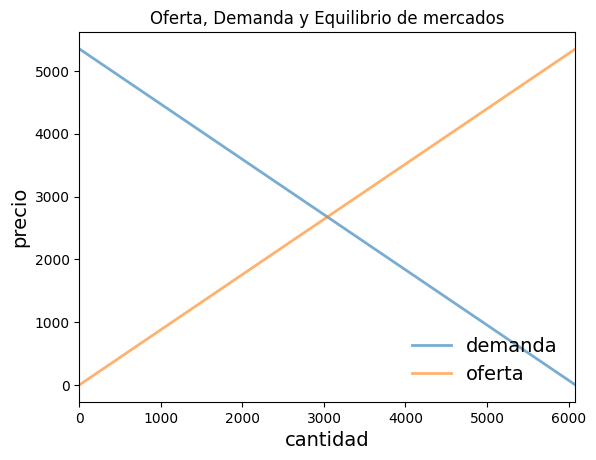

Excedente productor = 4069650
Excedente consumidor = 4069650
Excedente total = 8139300
Cantidad de equilibrio = 3042
Precio de equilibrio = 2676


In [ ]:
class mercado:    
    def __init__(self, DAPmax, COmin, d, s):
          
        self.DAPmax, self.COmin, self.d, self.s = DAPmax, COmin, d, s
        
        if DAPmax < COmin:
            raise ValueError('Demanda insuficiente.')

    def cantidad_equilibrio(self):
        "Cálculo cantidad de equilibrio"
        return  (self.DAPmax - self.COmin)/(self.d + self.s)

    def precio_equilibrio(self):
        "Cálculo cantidad de equilibrio"
        return  self.DAPmax - self.d * self.cantidad_equilibrio()

    def excedente_consumidor(self):
        "Cálculo excedente consumidor"
        return (self.DAPmax - self.precio_equilibrio())*self.cantidad_equilibrio()/2

    def excedente_productor(self):
        "Cálculo excedente productor"
        return (self.precio_equilibrio() - self.COmin) * self.cantidad_equilibrio() /2

    def excedente_total(self):
        "Cálculo excedente total"
        return self.excedente_productor() + self.excedente_consumidor()
    
    def demanda(self,x):
        "Función demanda"
        return self.DAPmax - self.d*x
        
    def oferta(self,x):
        "Función oferta"
        return self.COmin + self.s*x


import numpy as np
import matplotlib.pyplot as plt
%matplotlib inline

# Parámetros iniciales DAPmax, COmin, d, s
params_ini = 5351.08,0,0.8795,0.8795
m = mercado(*params_ini)

q_max = m.cantidad_equilibrio() * 2
q_grid = np.linspace(0.0, q_max, 100)
pd = m.demanda(q_grid)
ps = m.oferta(q_grid)

fig, ax = plt.subplots()
ax.plot(q_grid, pd, lw=2, alpha=0.6, label='demanda')
ax.plot(q_grid, ps, lw=2, alpha=0.6, label='oferta')
ax.set_xlabel('cantidad', fontsize=14)
ax.set_xlim(0, q_max)
ax.set_ylabel('precio', fontsize=14)
ax.legend(loc='lower right', frameon=False, fontsize=14)
ax.set(title='Oferta, Demanda y Equilibrio de mercados')
plt.show()

print("Excedente productor =",round(m.excedente_productor()))
print("Excedente consumidor =",round(m.excedente_consumidor()))
print("Excedente total =",round(m.excedente_total()))
print("Cantidad de equilibrio =",round(m.cantidad_equilibrio()))
print("Precio de equilibrio =",round(m.precio_equilibrio()))



P5. Fue subido a un repositorio en Github

# Fuentes 



> (1) CNE (2019) *Datos Históricos de Precios de Nudo de Sistemas Eléctricos Chilenos* https://www.cne.cl/normativas/electrica/consulta-publica/electricidad/


> (2) Colbún (2021) *Memoria Integrada* https://www.colbun.cl/docs/default-source/press-room/annual-reports/memoria_espanol_2021.pdf

> (3) Colbún (2021) *Centrales de Energía Fotovoltaica*
https://www.colbun.cl/energias-renovables/centrales-de-energia-renovable

> (4) El mostrador (2020) *Energía Solar* https://www.elmostrador.cl/noticias/opinion/columnas/2021/07/16/energia-solar-un-pilar-del-futuro-energetico-de-chile/

> (5) Mordor Intelligence (2019) *Mercado de Energía Solar en Chile* https://www.mordorintelligence.com/es/industry-reports/chile-solar-energy-market


